
  <h1 class="display-3">Credit Risk Case Study in Python</h1>
  <h3>Using Logistic Regression</h3>
  
<hr>
<h3> What is Credit risk? </h3>
Credit risk refers to the risk that a borrower may not repay a loan and that the lender may lose the principal of the loan or the interest associated with it. In Banking sector this is an important factor to be considered before approving the loan of an applicant.

<h3> How Is Credit Risk Assessed? </h3>
Credit risks are calculated based on the borrowers' overall ability to repay. To assess credit risk on a consumer loan, lenders look at the five C's: an applicant's credit history, his capacity to repay, his capital, the loan's conditions and associated collateral.

<h3> Problem </h3>
To automate the loan eligibility process based on the customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, we given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

<h3> Data Variables and Description </h3>
<table>
 <tr> <th align="left">Variable</th> <th align="left">Description</th> </tr>
 <tr> <td>Loan_ID</td> <td>Unique Loan ID</td> </tr>
 <tr> <td>Gender</td> <td>Male/ Female</td> </tr>
 <tr> <td>Married</td> <td>Applicant married (Y/N)</td> </tr>
 <tr> <td>Dependents</td> <td>Number of dependents</td> </tr>
 <tr> <td>Education</td> <td>Applicant Education (Graduate/ Under Graduate)</td> </tr>
 <tr> <td>Self_Employed</td> <td>Self employed (Y/N)</td> </tr>
 <tr> <td>ApplicantIncome</td> <td>Applicant income</td> </tr>
 <tr> <td>CoapplicantIncome</td> <td>Coapplicant income</td> </tr>
 <tr> <td>LoanAmount</td> <td>Loan amount in thousands</td> </tr>
 <tr> <td>Loan_Amount_Term</td> <td>Term of loan in months</td> </tr>
 <tr> <td>Credit_History</td> <td>credit history meets guidelines</td> </tr>
 <tr> <td>Property_Area</td> <td>Urban/ Semi Urban/ Rural</td> </tr>	
 <tr> <td>Loan_Status</td> <td>Loan approved (Y/N)</td> </tr>			
</table>

<h3> Dataset File Given </h3>
* Credit_Risk_Train_Data
* Credit_Risk_Test_Data
  
 
 <h2>Index</h2> <br>
 &#x25FE; [Importing Datasets](#ImportingDatasets) <br>
 &#x25FE; [Finding NULL Values](#FindNULLVal) <br>
 &#x25FE; [Counting Levels in Datasets](#CountDSLevels) <br>
 &#x25FE; [Treating NULL Values & Converting Variables into 0's and 1's](#TreatNULLVal) <br>
 &#x25FE; [Plot and Graphs](#Plots) <br>
 &#x25FE; [Logistic Regression](#logreg) <br>
 &#x25FE; [Classification Report using Stats Model](#classreport_statsmod) <br>
 &#x25FE; [Classification Report using Sci Kit Learn](#classreport_scikit) <br>
 &#x25FE; [Model Performance Evaluation](#ModPerformEva) <br>
 &#x25FE; [Confusion Matrix](#ConfMat) <br>
 &#x25FE; [Adjusting the Classification Threshold](#AdjClassThershold) <br>
 &#x25FE; [ Decreasing the Threshold [Optional]](#DecThreshold) <br>
 &#x25FE; [ROC Curves and Area Under the Curve (AUC)](#rocauc) <br>
 &#x25FE; [Exporting predicted values in Validate Dataset File](#ExportVals) <br>
 &#x25FE; [Conclusion](#Conclusion) <br>

<a id="head"></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import pylab as pl

<a id="ImportingDatasets"></a>
# Importing Datasets

### Importing Traning Dataset

In [4]:
# Importing Train Datset
train_data = pd.read_csv("F:/Lectures/Data Science/iMarticus/Python/Scripts/iMarticus-Projects/Datasets/Credit_Risk_Train_Data.csv")
train_data = pd.DataFrame(train_data)
train_data.shape # Shape gives you total number of observations and variables present in datasets

(614, 13)

In [5]:
train_data.info() # Info gives you name of each variable with the data type associated with it.
train_data.head(3) # Head gives you first few rows of the dataset. (3 is the nummber of rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Importing Testing Dataset

In [6]:
# Importing Test Datset
test_data = pd.read_csv("F:/Lectures/Data Science/iMarticus/Python/Scripts/iMarticus-Projects/Datasets/Credit_Risk_Test_Data.csv")
test_data = pd.DataFrame(test_data)
test_data.shape

(367, 13)

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
outcome              367 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [8]:
test_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y


<a id="FindNULLVal"></a>
# Finding NULL Values

In [9]:
train_data.isnull().sum() # Gives Variable wise NaN values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train_data.isnull().sum().sum() #136 # Gives total number of NaN values in a dataset

149

In [11]:
test_data.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
outcome               0
dtype: int64

In [12]:
test_data.isnull().sum().sum() #84

84

<a id="CountDSLevels"></a>
# Counting Levels in Datasets

Counting the levels of variables in dataset is important because it shows the distribution of elements in categorical variable. In addation to that it also shows the wrongly entred elements. Like in case of **Dependents** variable (3+ = 51).

## For Traning Dataset

In [13]:
train_data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
train_data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
train_data.Dependents.value_counts()  # 3+

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
train_data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
train_data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
train_data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [19]:
train_data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
train_data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
train_data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
train_data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## For Testing Dataset

In [23]:
test_data.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [24]:
test_data.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [25]:
test_data.Dependents.value_counts()  # 3+

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [26]:
test_data.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [27]:
test_data.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [28]:
train_data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [29]:
test_data.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
test_data.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [31]:
test_data.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

<a id="TreatNULLVal"></a>

# Treating NULL Values and Converting Variables into 0's and 1's 

### Key

* **Gender**          : Male=1 | Female=0
* **Married** 	      : Yes=1	| No=0
* **Dependents**      : 0,1,2,3
* **Education**	  	  : Graduate=1 | Not Graduate=0
* **Self_Employed**   : Yes=1 | No=0
* **Credit_History**  : 0 and 1
* **Property_Area**   : Urban=1 | Rural=2 | SemiUrban=3
* **Loan_Status**	  : Yes=1	| No=0

### Categorical Encoding
* <p>The idea is to convert the all categorical variable into 0s, 1s, 2s, etc and into numeric integers. Though Logistics Regression is roboust to handle categorical variable but it is always a good practice to convert things into numerical values because its all about mathematical calculations.</p>
* <p>To do this we have LabelEncoder package from SciKit learn that encodes the labels with value between **0 and n_classes-1**. Though there are several other [methods](http://pbpython.com/categorical-encoding.html)  to do this. [Label Encoder Help](https://chrisalbon.com/machine-learning/convert_pandas_categorical_column_into_integers_for_scikit-learn.html) <br></p>
* <p>The **fit_transform(y)** function fit label encoder (male/female) and return encoded labels (1/0) </p>
* <p>By default the fit_transform() function will encode the NaN values also. So, we have to take care of them in best possible way.</p>

In [32]:
# Importing the LabelEncoder Libraries
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

## For Traning Dataset

In [33]:
train_data['Gender'] = number.fit_transform(train_data['Gender'].astype('str')) # This makes three levels 0,1, NaN = 2 
avgnum = np.round(np.mean(train_data['Gender'])) # So, we have to convert '2' into either 1 or 0 by taking the mean.
train_data['Gender'].replace(2,avgnum,inplace=True) # This replaces '2' with Rounded Avg Value

train_data['Married'] = number.fit_transform(train_data['Married'].astype('str'))
avgnum = np.round(np.mean(train_data['Married']))
train_data['Married'].replace(2,avgnum,inplace=True)

train_data['Dependents'] = number.fit_transform(train_data['Dependents'].astype('str')) # Creates 4 levels
train_data['Dependents'].replace(4,3,inplace=True) # The 4th level is converted into 3

train_data['Education'] = number.fit_transform(train_data['Education'].astype('str'))

train_data['Self_Employed'] = number.fit_transform(train_data['Self_Employed'].astype('str'))
avgnum = np.round(np.mean(train_data['Self_Employed']))
train_data['Self_Employed'].replace(2,avgnum,inplace=True)

avgnum = np.round(np.mean(train_data['Loan_Amount_Term'])) # It gives 342 which is closer to 360
train_data.Loan_Amount_Term.fillna(360 ,inplace = True) # So, filled NA values with 360

avgnum = np.round(np.mean(train_data['LoanAmount'])) # It gives 146 
train_data.LoanAmount.fillna(146 ,inplace = True) # So, filled NA values with 146

avgnum = np.round(np.mean(train_data['Credit_History'])) # It gives 1
train_data.Credit_History.fillna(1 ,inplace = True) # So, filled NA values with 1

train_data['Property_Area'] = number.fit_transform(train_data['Property_Area'].astype('str'))
train_data['Loan_Status'] = number.fit_transform(train_data['Loan_Status'].astype('str'))

In [34]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [35]:
train_data.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## For Testing Dataset

In [36]:
test_data['Gender'] = number.fit_transform(test_data['Gender'].astype('str'))  
avgnum = np.round(np.mean(test_data['Gender'])) 
test_data['Gender'].replace(2,avgnum,inplace=True) 

test_data['Married'] = number.fit_transform(test_data['Married'].astype('str'))
avgnum = np.round(np.mean(test_data['Married']))
test_data['Married'].replace(2,avgnum,inplace=True)

test_data['Dependents'] = number.fit_transform(test_data['Dependents'].astype('str')) # Creates 4 levels
test_data['Dependents'].replace(4,3,inplace=True) # The 4th level is converted into 3

test_data['Education'] = number.fit_transform(test_data['Education'].astype('str'))

test_data['Self_Employed'] = number.fit_transform(test_data['Self_Employed'].astype('str'))
avgnum = np.round(np.mean(test_data['Self_Employed']))
test_data['Self_Employed'].replace(2,avgnum,inplace=True)

avgnum = np.round(np.mean(test_data['Loan_Amount_Term'])) # It gives 343 which is closer to 360
test_data.Loan_Amount_Term.fillna(360 ,inplace = True) # So, filled NA values with 360

avgnum = np.round(np.mean(test_data['LoanAmount'])) # It gives 136 
test_data.LoanAmount.fillna(136 ,inplace = True) # So, filled NA values with 146

avgnum = np.round(np.mean(test_data['Credit_History'])) # It gives 1
test_data.Credit_History.fillna(1 ,inplace = True) # So, filled NA values with 1

test_data['Property_Area'] = number.fit_transform(test_data['Property_Area'].astype('str'))
test_data['outcome'] = number.fit_transform(test_data['outcome'].astype('str'))

In [37]:
test_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1


In [38]:
test_data.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
outcome              0
dtype: int64

<a id="Plots"></a>
# Plot and Graphs 

Now, we are going to make some graphs to see the visualization of train dataset. For this I am going to used seaborn package, that is a is a Python visualization library based on matplotlib.[More Info.](https://seaborn.pydata.org/introduction.html#introduction)

In [39]:
# Setting up the style and grid style of seaborn graphs
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# palette=pkmn_type_colors

## Heatmap

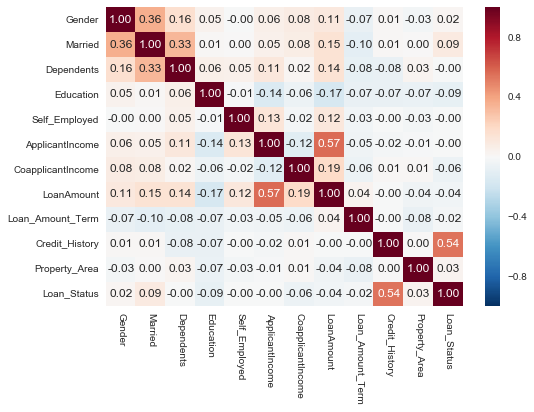

In [40]:
# Calculate correlations Using Heatmap
corr = train_data.corr()
sns.heatmap(corr, annot=True, fmt="0.2f"); # annot:write the data value in each cell | fmt:String formatting code d=decimal f=float  
plt.xticks(rotation=-90) # Heatmap
plt.show()

The scale shows Pearson Coefficient (-1 to 1), the values near to 1 or -1 have high correlation. <br>
The heatmap clearly shows that there is very less corelations between most of the variables and target variable **Loan_Status**. But **Credit_History** has a good corelation with **Loan_Status**.

## Distribution Plot (a.k.a. Histogram)

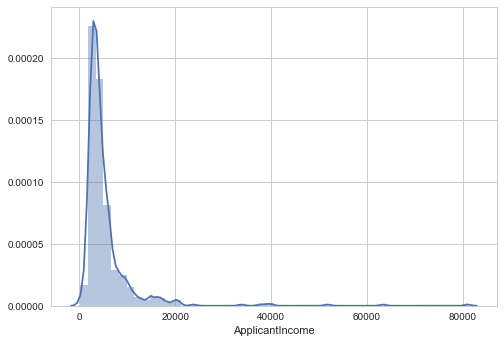

In [41]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(train_data.ApplicantIncome)
plt.show()

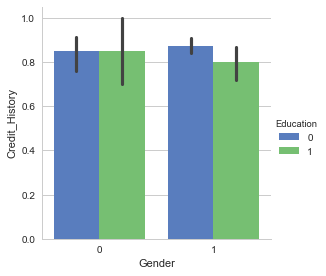

In [42]:
sns.factorplot("Gender", "Credit_History", "Education", data=train_data, kind="bar", palette="muted", legend=True)
plt.show()

## Pair Plot

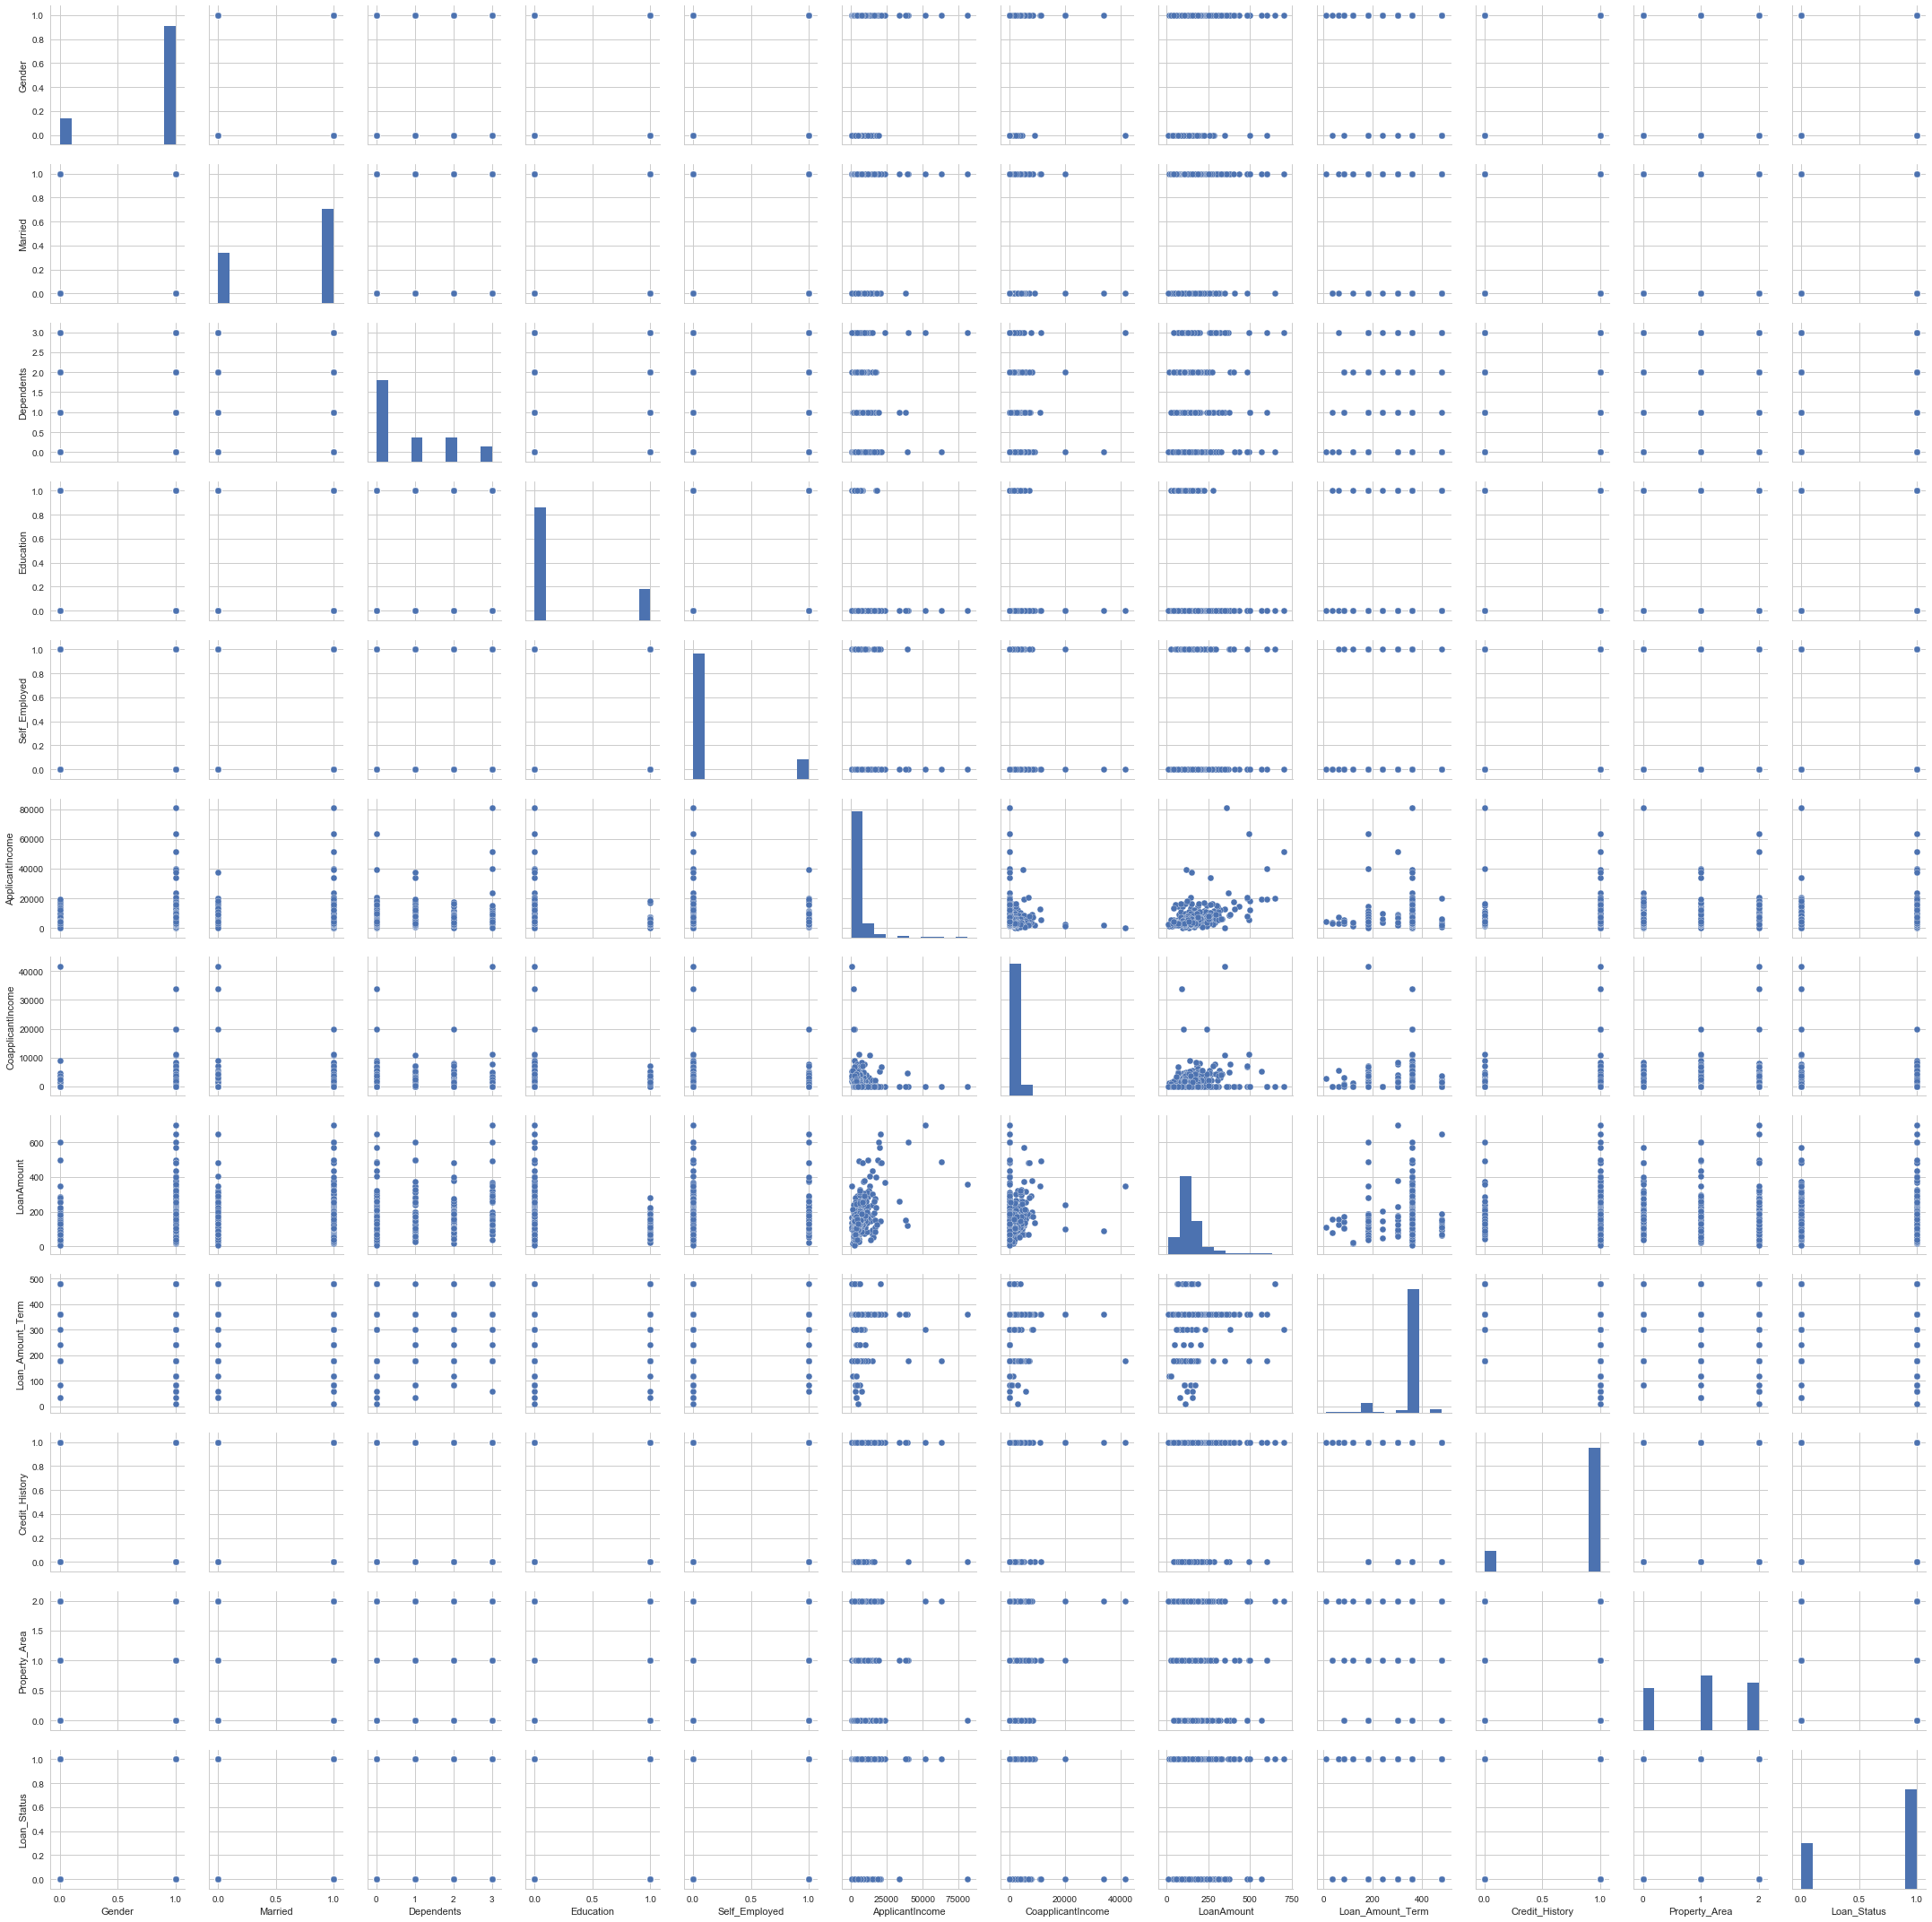

In [43]:
# Pair Plot
sns.pairplot(train_data)
plt.show()

## Boxplot

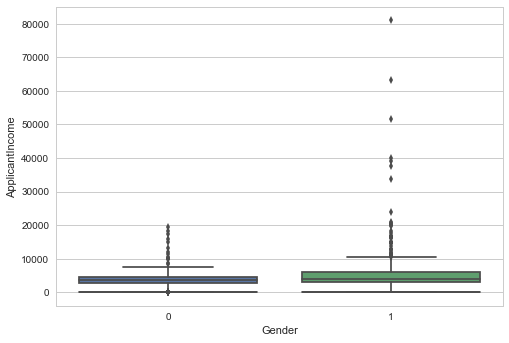

In [44]:
# Boxplot
sns.boxplot(data=train_data, palette="deep")
sns.boxplot(x='Gender' , y='ApplicantIncome', data=train_data, palette="deep")
plt.show()

## Joint Distribution Plot

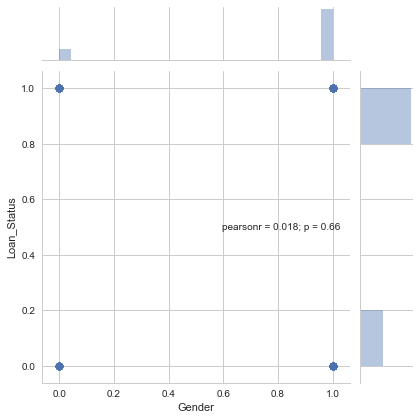

In [45]:
# Joint Distribution Plot
sns.jointplot(x='Gender', y='Loan_Status', data=train_data)
plt.show()


<a id="logreg"></a>
# === Logistic Regression ===

#### We will drop the Loan_ID coloumn as it is not required.  And build the model using all the variable first, to check the most significant variables (using p-values).

In [46]:
train_data_new = train_data.drop(['Loan_ID'], 1)
train_data_new.head(3) # 94.55% Accuracy | AUC = 92%

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [47]:
# Validating Dataset
test_data_new = test_data.drop(['Loan_ID'], 1)
test_data_new.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1


In [49]:
# Taking Train Dataset values in two variables
X_train = train_data_new.ix[:,(0,1,2,3,4,5,6,7,8,9,10)]
X_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2


In [50]:
y_train = train_data_new.ix[:,11]
y_train.head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [52]:
# Taking Validate Dataset values as test data
# The purpose of doing this is : Test Data does not have a "Outcome" variable 
# So, the predicted values will be compared with "Outcome" variable of Validate Data
X_test = test_data_new.ix[:,(0,1,2,3,4,5,6,7,8,9,10)]
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [53]:
y_test = test_data_new.ix[:,11]
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: outcome, dtype: int64

<a id="classreport_statsmod"></a>
# Classification Report using Stats Model
### This is done to view the proper output of Logistic Regression. Because SciKit Learn package does not give this much of detailed output.  

In [54]:
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.466576
         Iterations 6


In [55]:
logit_model.summary() # Gives the summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      602
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 Dec 2017   Pseudo R-squ.:                  0.2490
Time:                        21:55:36   Log-Likelihood:                -286.48
converged:                       True   LL-Null:                       -381.45
                                        LLR p-value:                 9.059e-35
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2485      0.818     -2.748      0.006      -3.852      -0.645
Gender               -0.0888      0.288     -0.308      0.758      -0.654       0.476
Married               0.5721      0.243      2.355      0.019       0.096       1.048
Dependents            0.0581      0.111      0.522      0.602      -0.160       0.276
Education            -0.4291      0.256     -1.677      0.094      -0.931       0.073
Self_Employed        -0.0102      0.310     -0.033      0.974      -0.619       0.598
ApplicantIncome    9.937e-06    2.3e-05      0.431      0.666   -3.52e-05    5.51e-05
CoapplicantIncome -5.136e-05   3.36e-05     -1.530      0.126      -0.000    1.44e-05
LoanAmount           -0.0021      0.002     -1.340      0.180      -0.005       0.001
Loan_Amount_Term     -0.0007      0.002     -0.412      0.681      -0.004       0.003
Credit_History        3.8553      0.414      9.312      0.000       3.044       4.667
Property_Area         0.0872      0.135      0.646      0.518      -0.177       0.352
=====================================================================================
"""

> ### When model with all the variable was generated it gives Accuracy of 94.55% and AUC of 92%. Also, it shows that the Married and Credit_History variable are only siginificant variable.

In [56]:
logit_model.conf_int() # gives you idea for how robust the coefficients of the model are

,0,1
const,-3.851879,-0.645025
Gender,-0.654031,0.476432
Married,0.095934,1.048294
Dependents,-0.159939,0.276053
Education,-0.930749,0.072531
Self_Employed,-0.618794,0.598336
ApplicantIncome,-0.000035,0.000055
CoapplicantIncome,-0.000117,0.000014
LoanAmount,-0.005160,0.000969
Loan_Amount_Term,-0.004168,0.002722


In [57]:
np.exp(logit_model.params) # odds ratios # the exponential of each of the coefficients to generate the odds ratios.
# All the odds ratio must be above 1, meaning that they are positively associated with <target_variable/dependent_variable>

const                 0.105563
Gender                0.915029
Married               1.772010
Dependents            1.059775
Education             0.651089
Self_Employed         0.989823
ApplicantIncome       1.000010
CoapplicantIncome     0.999949
LoanAmount            0.997907
Loan_Amount_Term      0.999277
Credit_History       47.240483
Property_Area         1.091085
dtype: float64

========================================================================================================================

### Now, building a model using only Married and Credit History variables. <br>(As these variables are significant with Loan_Status)

In [58]:
train_data_new = train_data.drop(['Loan_ID', 'Gender','Dependents', 'Self_Employed', 'Education', 'Property_Area', 'ApplicantIncome', 'Loan_Amount_Term','CoapplicantIncome', 'LoanAmount' ], 1)
train_data_new.head(3) # 95% Accuracy | ROC = 91%

,Married,Credit_History,Loan_Status
0,0,1.0,1
1,1,1.0,0
2,1,1.0,1


In [59]:
test_data_new = test_data.drop(['Loan_ID', 'Gender','Dependents', 'Self_Employed', 'Education', 'Property_Area', 'ApplicantIncome', 'Loan_Amount_Term','CoapplicantIncome', 'LoanAmount' ], 1)
test_data_new.head(3)

,Married,Credit_History,outcome
0,1,1.0,1
1,1,1.0,1
2,1,1.0,1


In [61]:
# Taking Train Dataset values in two variables
X_train = train_data_new.ix[:,(0,1)]
X_train.head()

,Married,Credit_History
0,0,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,1.0


In [62]:
y_train = train_data_new.ix[:,2]
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [64]:
# Taking Validate Dataset values as test data
# The purpose of doing this is : Test Data does not have a "Outcome" variable 
# So, the predicted values will be compared with "Outcome" variable of Validate Data
X_test = test_data_new.ix[:,(0,1)]
X_test.head()

,Married,Credit_History
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,1.0


In [66]:
y_test = test_data_new.ix[:,2]
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: outcome, dtype: int64

<a id="classreport_scikit"></a>
## Classification Report using Sci Kit Learn

In [67]:
logreg = LogisticRegression(fit_intercept=True,C = 1e15)
logreg.fit(X_train, y_train)
logreg.get_params()
logreg.decision_function(X_train)


array([ 0.99700476,  1.53029561,  1.53029561,  1.53029561,  0.99700476,
        1.53029561,  1.53029561, -2.29550214,  1.53029561,  1.53029561,
        1.53029561,  1.53029561,  1.53029561,  0.99700476,  1.53029561,
        0.99700476,  0.99700476, -2.82879299,  1.53029561,  1.53029561,
       -2.29550214,  1.53029561, -2.29550214, -2.29550214,  1.53029561,
        1.53029561,  1.53029561,  1.53029561,  0.99700476,  0.99700476,
        1.53029561,  0.99700476,  0.99700476,  1.53029561,  0.99700476,
        1.53029561, -2.29550214,  1.53029561,  0.99700476,  0.99700476,
        0.99700476,  0.99700476,  1.53029561,  1.53029561,  1.53029561,
        0.99700476,  1.53029561,  1.53029561, -2.29550214,  0.99700476,
        1.53029561,  0.99700476,  0.99700476,  1.53029561, -2.29550214,
        1.53029561,  1.53029561,  1.53029561,  1.53029561,  1.53029561,
        1.53029561,  1.53029561, -2.29550214, -2.29550214, -2.82879299,
        1.53029561, -2.82879299,  1.53029561,  1.53029561, -2.82

> ### Predicting the variable

In [68]:
# The y_pred = logreg.predict(X_test) will give output as a class prediction (0 and 1) 
# for every observstion in a testing set, which will store in y_pred class.
y_pred = logreg.predict(X_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [69]:
# Calculating R Sq.
sklearn.metrics.r2_score(y_test, y_pred)

0.67129422301836095

In [70]:
# classification Report using Scikit Learn
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.98      0.75      0.85        77
          1       0.94      1.00      0.97       290

avg / total       0.95      0.95      0.94       367



In [71]:
logreg.score(X_test, y_test) # Exact Accuracy


0.94550408719346046

In [72]:
logreg.coef_

array([[ 0.53329085,  3.82579775]])

In [73]:
logreg.intercept_

array([-2.82879299])

<a id="ModPerformEva"></a>
### =======================================================================
# Model Performance Evaluation 
### =======================================================================

 __Classification Accuracy:__ Percentage of correct predictions

In [74]:
# Model Accuracy or The correct classification of model in %

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.945504087193


__ Null accuracy: __ It is an accuracy that could be achieved by always predicting the most frequent class (most numbers of 0s or 1s). It is important to compare Classification accuracy with Null Accuracy 
**_Whichever, 0s or 1s is maximum is the NULL accuracy_**

* This answer the question of _"if my model wants to predict the predominant (main/chief/principal) class 100% of the time, How often would it be correct?_
* Its like dummy model which would be correct the maximum percentage of the time. 
* In this case **79.01%** of the time the model will predict Loan Outcome as 1 (Yes). 
* Now, this is not a geniun model but it gives a baseline to predict out logistic regression model.

In [75]:
y_test.value_counts() # examine the class distribution of the testing set (using a Pandas Series method)

1    290
0     77
Name: outcome, dtype: int64

In [76]:
y_test.mean() # calculate the percentage of ones

0.7901907356948229

In [77]:
1 - y_test.mean() # calculate the percentage of zeros

0.2098092643051771

In [78]:
max(y_test.mean(), 1 - y_test.mean()) # calculates null accuracy (for binary classification problems coded as 0/1)

0.7901907356948229

In [79]:
y_test.value_counts().head(1) / len(y_test) # calculates null accuracy (for multi-class classification problems)

1    0.790191
Name: outcome, dtype: float64

In [80]:
y_test.value_counts()


1    290
0     77
Name: outcome, dtype: int64

In [81]:
np.bincount(y_pred) # Count the elements of an numpy array

array([ 59, 308], dtype=int64)

#### Drawbacks of Classification accuracy :+1:
* Classification accuracy is the easiest classification metric to understand. __But,__ it does not tell you the underlying distribution of response values (NULL accuracy tells you this).
* And, it does not tell you what "types" of errors your classifier is making. ** _This problem can be solved by Confusion Matrix _ **

<a id="ConfMat"></a>
# Confusion Matrix

* Confusion Matrix Table describes the performance of a classification model

In [82]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred) # IMPORTANT: first argument is true values, second is predicted values
confmat # If you change the order of arguments the matrix will be reversed but no error will be raised.
# So always use a fixed place of those arguments.
# The result is telling us that we have 58+289=247 correct predictions
# and 19+1=20 incorrect predictions.

array([[ 58,  19],
       [  1, 289]], dtype=int64)

* __True Positives (TP):__ we correctly predicted that they do have diabetes
* __True Negatives (TN):__ we correctly predicted that they don't have diabetes
* __False Positives (FP):__ we incorrectly predicted that they do have diabetes (a "Type I error")
* __False Negatives (FN):__ we incorrectly predicted that they don't have diabetes (a "Type II error")

In [83]:
# Let us see the first 10 true and predicted responses
print('True:', y_test.values[0:10])
print('Pred:', y_pred[0:10])
# Identify the four cases for the output generated.

True: [1 1 1 1 0 1 1 0 1 1]
Pred: [1 1 1 1 1 1 1 0 1 1]


In [84]:
# slice confusion matrix into four pieces and save it 
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]

**Classification Accuracy:** Overall, how often is the classifier correct?

In [85]:
(TP + TN) / (TP + TN + FP + FN) 

0.94550408719346046

** Classification Error (_"Misclassification Rate"_):** Overall, how often is the classifier incorrect?

In [86]:
(FP + FN) / (TP + TN + FP + FN) 

0.054495912806539509

** Sensitivity (_"True Positive Rate" or "Recall"_):** When the actual value is positive (1), how often is the prediction correct?
* How "sensitive" is the classifier to detecting positive instances?
                     

In [87]:
TP / (TP + FN)

0.99655172413793103

**Specificity:** When the actual value is negative, how often is the prediction correct?
* How "specific" (or "selective") is the classifier in predicting positive instances?

In [88]:
TN / (TN + FP) 

0.75324675324675328

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [89]:
FP / (TN + FP)

0.24675324675324675

**Precision:** When a positive value is predicted, how often is the prediction correct?
* How "precise" is the classifier when predicting positive instances?

In [90]:
TP / (TP + FP) 

0.93831168831168832

** F1 score is the harmonic mean of precision and sensitivity **

In [91]:
(2*TP) / ((2*TP) + FP + FN) 

0.96655518394648832

#### Using Metrics

In [92]:
print(metrics.accuracy_score(y_test, y_pred)) # Classification Accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # Classification Error
print(metrics.recall_score(y_test, y_pred)) # Sensitivity
print(metrics.precision_score(y_test, y_pred)) # Precision
# Specificity has no metric function in scikitlearn.

0.945504087193
0.0544959128065
0.996551724138
0.938311688312


#### Sensitivity and Specificity must be as high as possible. 
* In this model we can describe that our classifier is highly Sensitive and highly Specific

<a id="AdjClassThershold"></a>
# Adjusting the Classification Threshold

In [93]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [94]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.17795044,  0.82204956],
       [ 0.17795044,  0.82204956],
       [ 0.17795044,  0.82204956],
       [ 0.17795044,  0.82204956],
       [ 0.26953073,  0.73046927],
       [ 0.17795044,  0.82204956],
       [ 0.26953073,  0.73046927],
       [ 0.90850384,  0.09149616],
       [ 0.17795044,  0.82204956],
       [ 0.26953073,  0.73046927]])

* Each row represents observation and the coloumn represents class 0 and 1
* The sum of each row is 1
* By default the classification threshold is set to 0.5 
* So, out of 2 values in each row the value greater than or eaual to 0.5 is stored as '1'
* **The value less than 0.5 is stored as '0'**

In [95]:
print (logreg.predict_proba(X_test)[0:10, 1]) # print the first 10 predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1] # And store the predicted probabilities for class 1

[ 0.82204956  0.82204956  0.82204956  0.82204956  0.73046927  0.82204956
  0.73046927  0.09149616  0.82204956  0.73046927]


<a id="Histogram_of_pred_prob"></a>
### Histogram of predicted probabilities for class 1

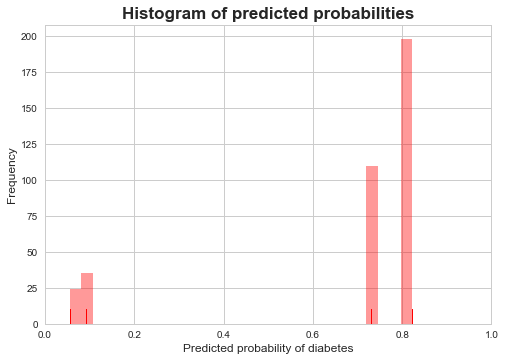

In [96]:
# If kernel density estimate (KDE) is set to TRUE then it shows density at y-axis
sns.distplot(y_pred_prob, color="red", kde=False, rug=True) # In this plot number of counts are shown at y-axis
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities', fontsize=17, fontweight='bold')
plt.xlabel('Predicted probability of diabetes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


* From this histogram we can see these probablities varies between **0 to 1**. And most of the points are above 0.6
* As we can clearly see that probability of ** 0.82 ** has the highst frequency  
* This states that majority of prediction (of class 1) occured are above 0.5 **[Default Threshold = 0.5]**
* If majority of prediction occured were below 0.5 then we might change our threshold value **(We can say class - 1 is rarely predicted)**
* ** But in this case we can say that class - 1 frequently predicted **

> * You can adjust Sensitivity and Specificity by setting threshold value
> * Sensitivity and specificity have an inverse relationship
> * Lower the cutoff higher will be the Sensitivity
> * Higher the cutoff higher will be the Specificity
> * So, depending on your business requirments you can increast or decrease thershold

 <a id="DecThreshold"></a>
 ** =====================================================================================================================**
 ## Decreasing the threshold in order to increase the sensitivity of the classifier  
 ** [Optional for this Project] **

In [97]:
# predict loan outcome if the predicted probability is greater than 0.1
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.1)[0] # Its a 2D numpy array and we will slice only first dimension

y_pred_prob[0:10] # print the first 10 predicted probabilities
y_pred_class[0:10] # print the first 10 predicted classes with the lower threshold
print(confmat) # previous confusion matrix (default threshold of 0.5)
metrics.confusion_matrix(y_test, y_pred_class) # new confusion matrix (threshold of 0.1)

290 / (290 + 0) # sensitivity has increased to 1 (used to be 0.99655172)
24 / (24 + 53) # specificity has decreased to 0.31168831 (used to be 0.7532467)
# =================================================================================

[[ 58  19]
 [  1 289]]


0.3116883116883117

 ** =====================================================================================================================**

<a id="rocauc"></a>
# ROC Curves and Area Under the Curve (AUC)

* It would be nice if we can see sensitivity and specificity are affected by various thresholds
* Without actually changing the threshold manually. (But if we change the threshold we have do the above process)
* We can do this by ROC curve. **[Receiver operating characteristic]**

In [98]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.auc(fpr, tpr) 
auc

0.90450067174205107

* Higher the AUC value better is the Classifier
* It is single number summary as a performance of classifier (alternative to accuract=y score)
* If you randomly chose one positive and one negative observation, AUC represents the 
* likelihood that your classifier will assign a higher predicted probability to the positive observation.

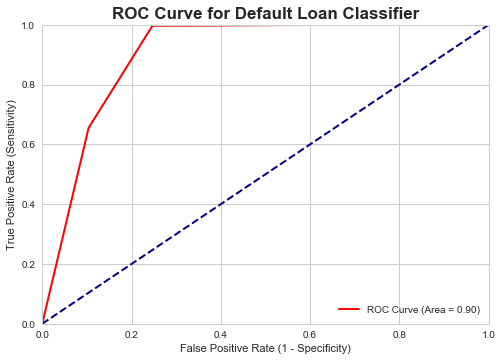

In [99]:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (Area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Default Loan Classifier', fontsize=17, fontweight='bold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [100]:
print("False Positive Rates : ", fpr) # Increasing false positive rates
print("True Positive Rates : ",tpr) # Increasing true positive rates
print("Thresholds : ",thresholds) # Decreasing thresholds on the deecision 

False Positive Rates :  [ 0.          0.1038961   0.24675325  0.68831169  1.        ]
True Positive Rates :  [ 0.          0.65517241  0.99655172  1.          1.        ]
Thresholds :  [ 1.82204956  0.82204956  0.73046927  0.09149616  0.05578794]


* The curve tells you that if you want to achave Senssitive of 0.90 then 
* You have to accept the specificity of 0.20
* ROC curve can help you to visually choose a threshold that balances sensitivity and specificity
* But you can't actually see the thresholds used to generate the curve on the ROC curve itself

## A function that accepts a threshold and prints sensitivity and specificity

* Refer to graph of [Histogram of Predicted robabilities](#Histogram_of_pred_prob) while studying the values of Sensitivity and Specificity.
* The graph is having 1-Specificity on the X-axis, which is converted to Specificity in the function.

In [102]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

This tells us that, when we set cutoff/threshold of 0.5 we get the **Sensitivity=0.99** and **Specificity: 0.75**

In [103]:
evaluate_threshold(0.5)

Sensitivity: 0.996551724138
Specificity: 0.753246753247


But when we set the cutoff to 0.01 we get the **Sensitivity=1** and **Specificity: 0**. This is because all the probabilities are above 0.01.

In [104]:
evaluate_threshold(0.01)

Sensitivity: 1.0
Specificity: 0.0


** So depending on your business requirment you have to adjust Sensitivity and Specificity **

<a id="ExportVals"></a>
## Exporting predicted values in Validate Dataset File

In [ ]:
test_data['Predicted Loan Status'] = y_pred 

In [ ]:
validate_data.to_csv('F:/Lectures/Data Science/iMarticus/Python/Project/Project 5-6 Case Study on Credit Risk/Predicted_Data.csv', index=False, encoding='utf-8') 

In [ ]:
validate_data.head(10)

<a id="Conclusion"></a>
# Conclusion

** Confusion matrix advantages:**
* Allows you to calculate a variety of metrics
* Useful for multi-class problems (more than two response classes)


** ROC/AUC advantages:**
* Does not require you to set a classification threshold
* Still useful when there is high class imbalance
* However, multi-class problems it is difficult to identify threshold

[Top](#head)